In [21]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

options(repr.plot.width = 13.0, repr.plot.height = 13.0)

[1] "retail-sales-analysis"

# **Import**

In [22]:
library(dplyr)
library(psych)
library(ggplot2)
library(gridExtra)
library(ggcorrplot)

# **1. Data Import & Structure**

In [23]:
data <- read.csv('/kaggle/input/retail-sales-analysis/Warehouse_and_Retail_Sales.csv')

* **YEAR : Calendar Year**
* **MONTH : Month**
* **SUPPLIER : Supplier Name**
* **ITEM CODE : Item code**
* **ITEM DESCRIPTION : Item Description**
* **ITEM TYPE : Item Type**
* **RETAIL SALES : Cases of product sold from DLC dispensaries**
* **RETAIL TRANSFERS : Cases of product transferred to DLC dispensaries**
* **WAREHOUSE SALES : Cases of product sold to MC licensees**

In [24]:
str(data)

'data.frame':	307645 obs. of  9 variables:
 $ YEAR            : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ MONTH           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ SUPPLIER        : chr  "REPUBLIC NATIONAL DISTRIBUTING CO" "PWSWN INC" "RELIABLE CHURCHILL LLLP" "LANTERNA DISTRIBUTORS INC" ...
 $ ITEM.CODE       : chr  "100009" "100024" "1001" "100145" ...
 $ ITEM.DESCRIPTION: chr  "BOOTLEG RED - 750ML" "MOMENT DE PLAISIR - 750ML" "S SMITH ORGANIC PEAR CIDER - 18.7OZ" "SCHLINK HAUS KABINETT - 750ML" ...
 $ ITEM.TYPE       : chr  "WINE" "WINE" "BEER" "WINE" ...
 $ RETAIL.SALES    : num  0 0 0 0 0.82 2.76 0.08 0 6.41 0.33 ...
 $ RETAIL.TRANSFERS: num  0 1 0 0 0 0 1 0 4 1 ...
 $ WAREHOUSE.SALES : num  2 4 1 1 0 6 1 2 0 2 ...


In [25]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
YEAR,1,307645,2018.438525,1.083061,2019.00,2018.423156,1.482600,2017.00,2020.00,3.00,-0.22546004,-1.3412203,0.001952665
MONTH,2,307645,6.423862,3.461812,7.00,6.470910,4.447800,1.00,12.00,11.00,-0.18037482,-1.2256558,0.006241350
SUPPLIER*,3,307645,188.797133,108.269245,193.00,189.297797,133.434000,1.00,397.00,396.00,-0.07538305,-1.1673717,0.195200164
ITEM.CODE*,4,307645,18399.789826,10389.607297,18670.00,18641.701158,13752.597600,1.00,34056.00,34055.00,-0.10982223,-1.2804043,18.731570966
ITEM.DESCRIPTION*,5,307645,17269.861681,10035.730840,17337.00,17227.254021,12997.954200,1.00,34822.00,34821.00,0.02018045,-1.2005975,18.093562061
ITEM.TYPE*,6,307645,7.003472,2.653233,9.00,7.379336,0.000000,1.00,9.00,8.00,-0.80472873,-0.9363066,0.004783551
RETAIL.SALES,7,307642,7.024071,30.986238,0.32,1.834725,0.474432,-6.49,2739.00,2745.49,19.42160491,722.3588728,0.055865802
RETAIL.TRANSFERS,8,307645,6.936465,30.237195,0.00,1.686941,0.000000,-38.49,1990.83,2029.32,17.38409541,531.4739822,0.054515070
WAREHOUSE.SALES,9,307645,25.294597,249.916798,1.00,3.022226,1.482600,-7800.00,18317.00,26117.00,28.80738185,1275.1266567,0.450578555


**Check missing value**

In [26]:
colSums(is.na(data))

YEAR            MONTH         SUPPLIER        ITEM.CODE 
               0                0                0                0 
ITEM.DESCRIPTION        ITEM.TYPE     RETAIL.SALES RETAIL.TRANSFERS 
               0                0                3                0 
 WAREHOUSE.SALES 
               0

**Duplicate check**

In [27]:
sum(duplicated(data))

[1] 0

In [28]:
summary(data)

      YEAR          MONTH          SUPPLIER          ITEM.CODE        
 Min.   :2017   Min.   : 1.000   Length:307645      Length:307645     
 1st Qu.:2017   1st Qu.: 3.000   Class :character   Class :character  
 Median :2019   Median : 7.000   Mode  :character   Mode  :character  
 Mean   :2018   Mean   : 6.424                                        
 3rd Qu.:2019   3rd Qu.: 9.000                                        
 Max.   :2020   Max.   :12.000                                        
                                                                      
 ITEM.DESCRIPTION    ITEM.TYPE          RETAIL.SALES      RETAIL.TRANSFERS  
 Length:307645      Length:307645      Min.   :  -6.490   Min.   : -38.490  
 Class :character   Class :character   1st Qu.:   0.000   1st Qu.:   0.000  
 Mode  :character   Mode  :character   Median :   0.320   Median :   0.000  
                                       Mean   :   7.024   Mean   :   6.936  
                                       3rd Qu.:

In [29]:
head(data)

,YEAR,MONTH,SUPPLIER,ITEM.CODE,ITEM.DESCRIPTION,ITEM.TYPE,RETAIL.SALES,RETAIL.TRANSFERS,WAREHOUSE.SALES
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0,2
2,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1,4
3,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0,1
4,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0,1
5,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0,0
6,2020,1,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,2.76,0,6


# **2. Data Transform**

In [30]:
names(data) <- c('YEAR','MONTH','SUPPLIER','CODE','DESCRIPTION','TYPE','RETAIL_SALES','RETAIL_TRANSFERS','WAREHOUSE_SALES')

In [31]:
data <- na.omit(data)

In [32]:
data$SUPPLIER <- as.factor(data$SUPPLIER)
data$TYPE <- as.factor(data$TYPE)
data$DESCRIPTION <- as.factor(data$DESCRIPTION)

**Check Data**

In [33]:
head(data)

,YEAR,MONTH,SUPPLIER,CODE,DESCRIPTION,TYPE,RETAIL_SALES,RETAIL_TRANSFERS,WAREHOUSE_SALES
,<int>,<int>,<fct>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0,2
2,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1,4
3,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0,1
4,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0,1
5,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0,0
6,2020,1,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,2.76,0,6


In [34]:
summary(data)

      YEAR          MONTH                                        SUPPLIER     
 Min.   :2017   Min.   : 1.000   REPUBLIC NATIONAL DISTRIBUTING CO   : 20995  
 1st Qu.:2017   1st Qu.: 3.000   LEGENDS LTD                         : 13634  
 Median :2019   Median : 7.000   SOUTHERN GLAZERS WINE AND SPIRITS   : 11720  
 Mean   :2018   Mean   : 6.424   E & J GALLO WINERY                  : 10816  
 3rd Qu.:2019   3rd Qu.: 9.000   THE COUNTRY VINTNER, LLC DBA WINEBOW: 10669  
 Max.   :2020   Max.   :12.000   MONSIEUR TOUTON SELECTION           : 10360  
                                 (Other)                             :229448  
     CODE                                              DESCRIPTION    
 Length:307642      BURGANS ALBARINO - 750ML                 :    44  
 Class :character   SANTA JULIA TORRONTES SUSTAINABLE - 750ML:    39  
 Mode  :character   LA VIELLE FERME CDV RED - 750ML          :    35  
                    LINGANORE BLACK RAVEN - 750ML            :    34  
             

# **3. Data Visualization**

**TYPE Aggregation**

In [38]:
type <- data %>% 
            group_by(TYPE) %>%
            summarize(N=n())

In [39]:
head(type)

TYPE,N
<fct>,<int>
,1
BEER,42413
DUNNAGE,95
KEGS,10146
LIQUOR,64910
NON-ALCOHOL,1905


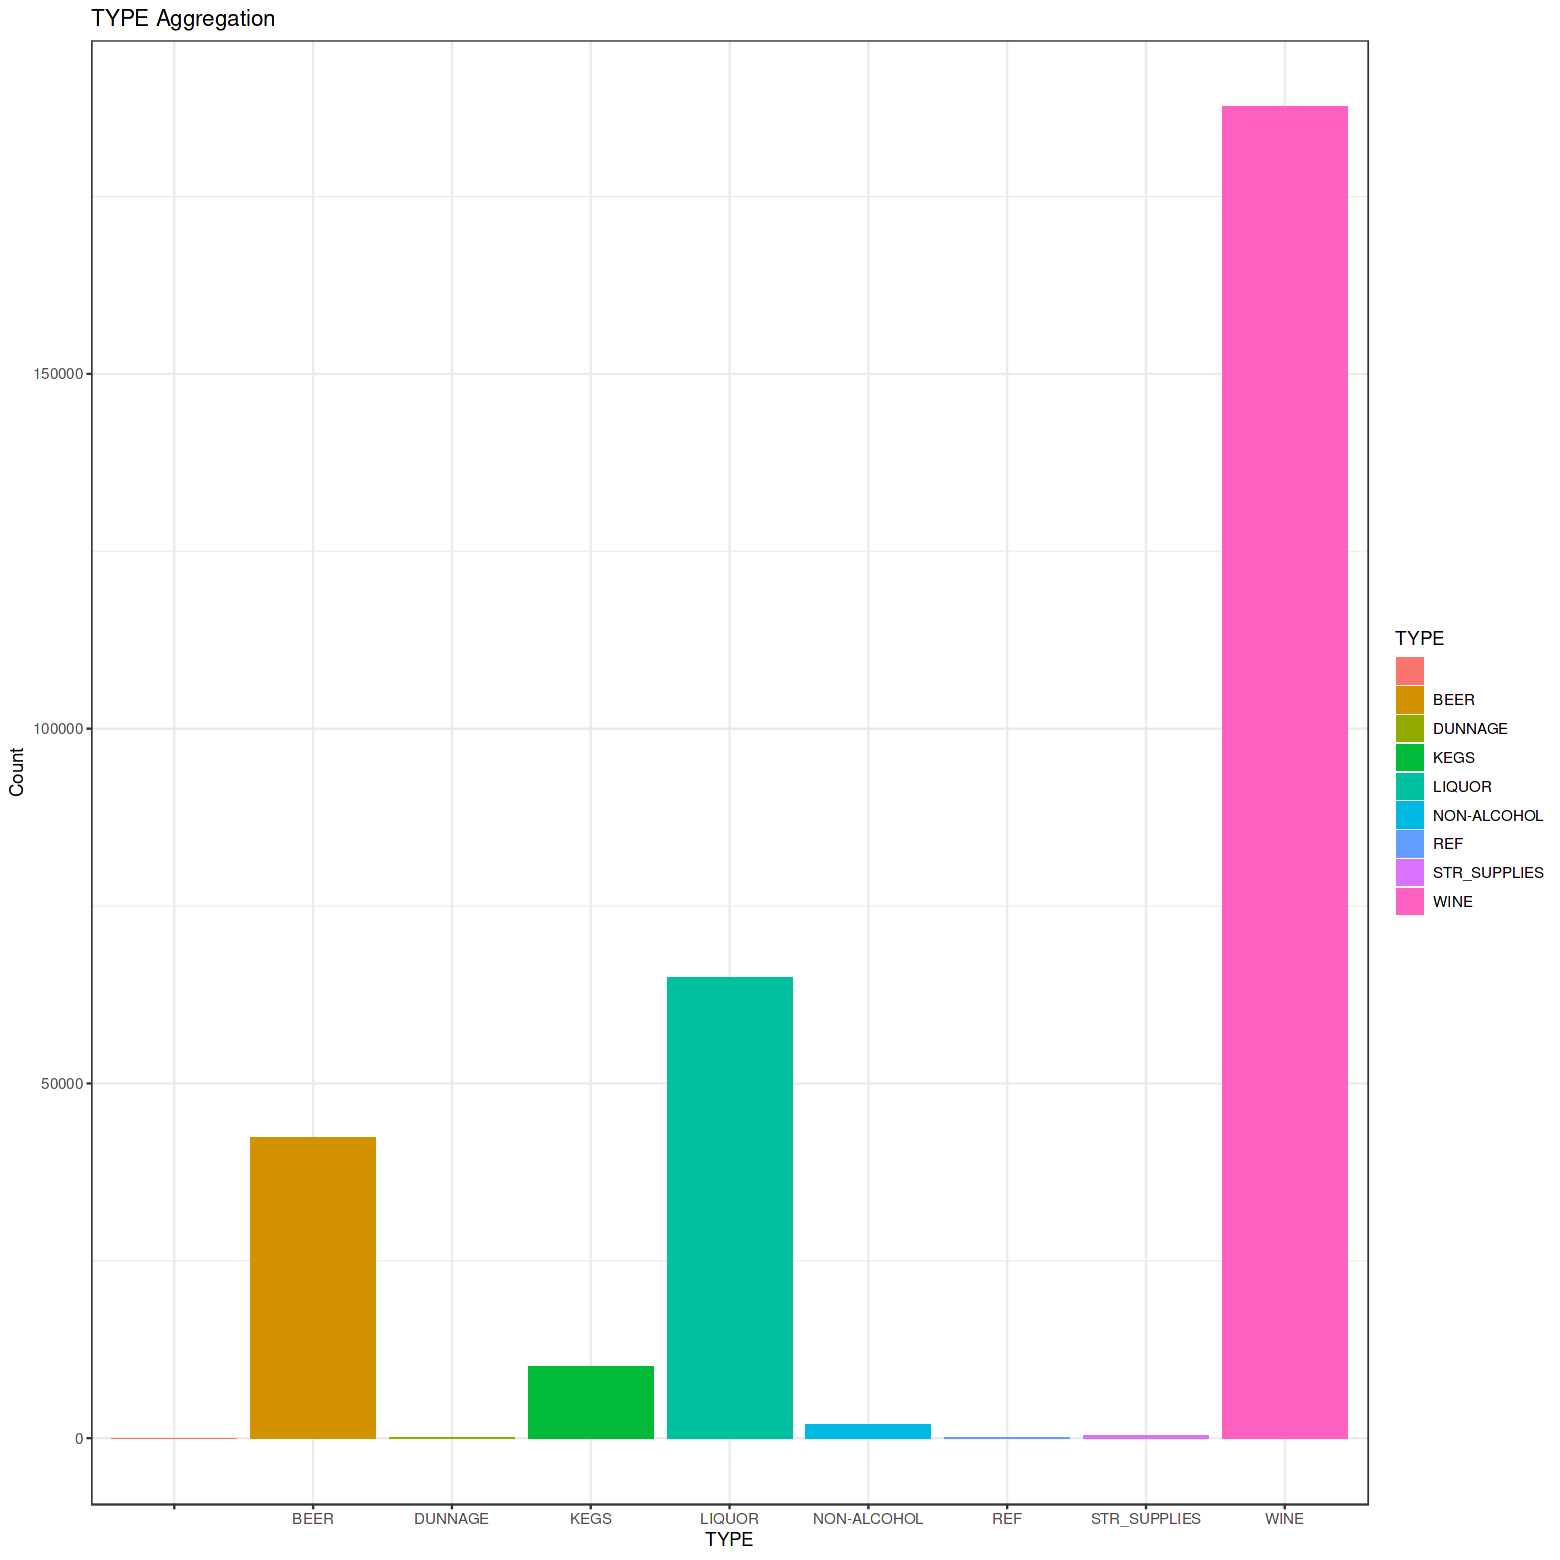

In [63]:
ggplot(type) + geom_col(aes(x = TYPE , y= N, fill = TYPE)) +  ylab('Count') + ggtitle('TYPE Aggregation ') + theme_bw()

--------

**Supplier Top3**

In [58]:
SUPPLIER <- data %>%
                group_by(SUPPLIER) %>%
                summarize(N=n()) %>%
                arrange(desc(N))


In [59]:
SUPPLIER_top3  <- SUPPLIER[1:3,]

In [61]:
SUPPLIER_top3

SUPPLIER,N
<fct>,<int>
REPUBLIC NATIONAL DISTRIBUTING CO,20995
LEGENDS LTD,13634
SOUTHERN GLAZERS WINE AND SPIRITS,11720


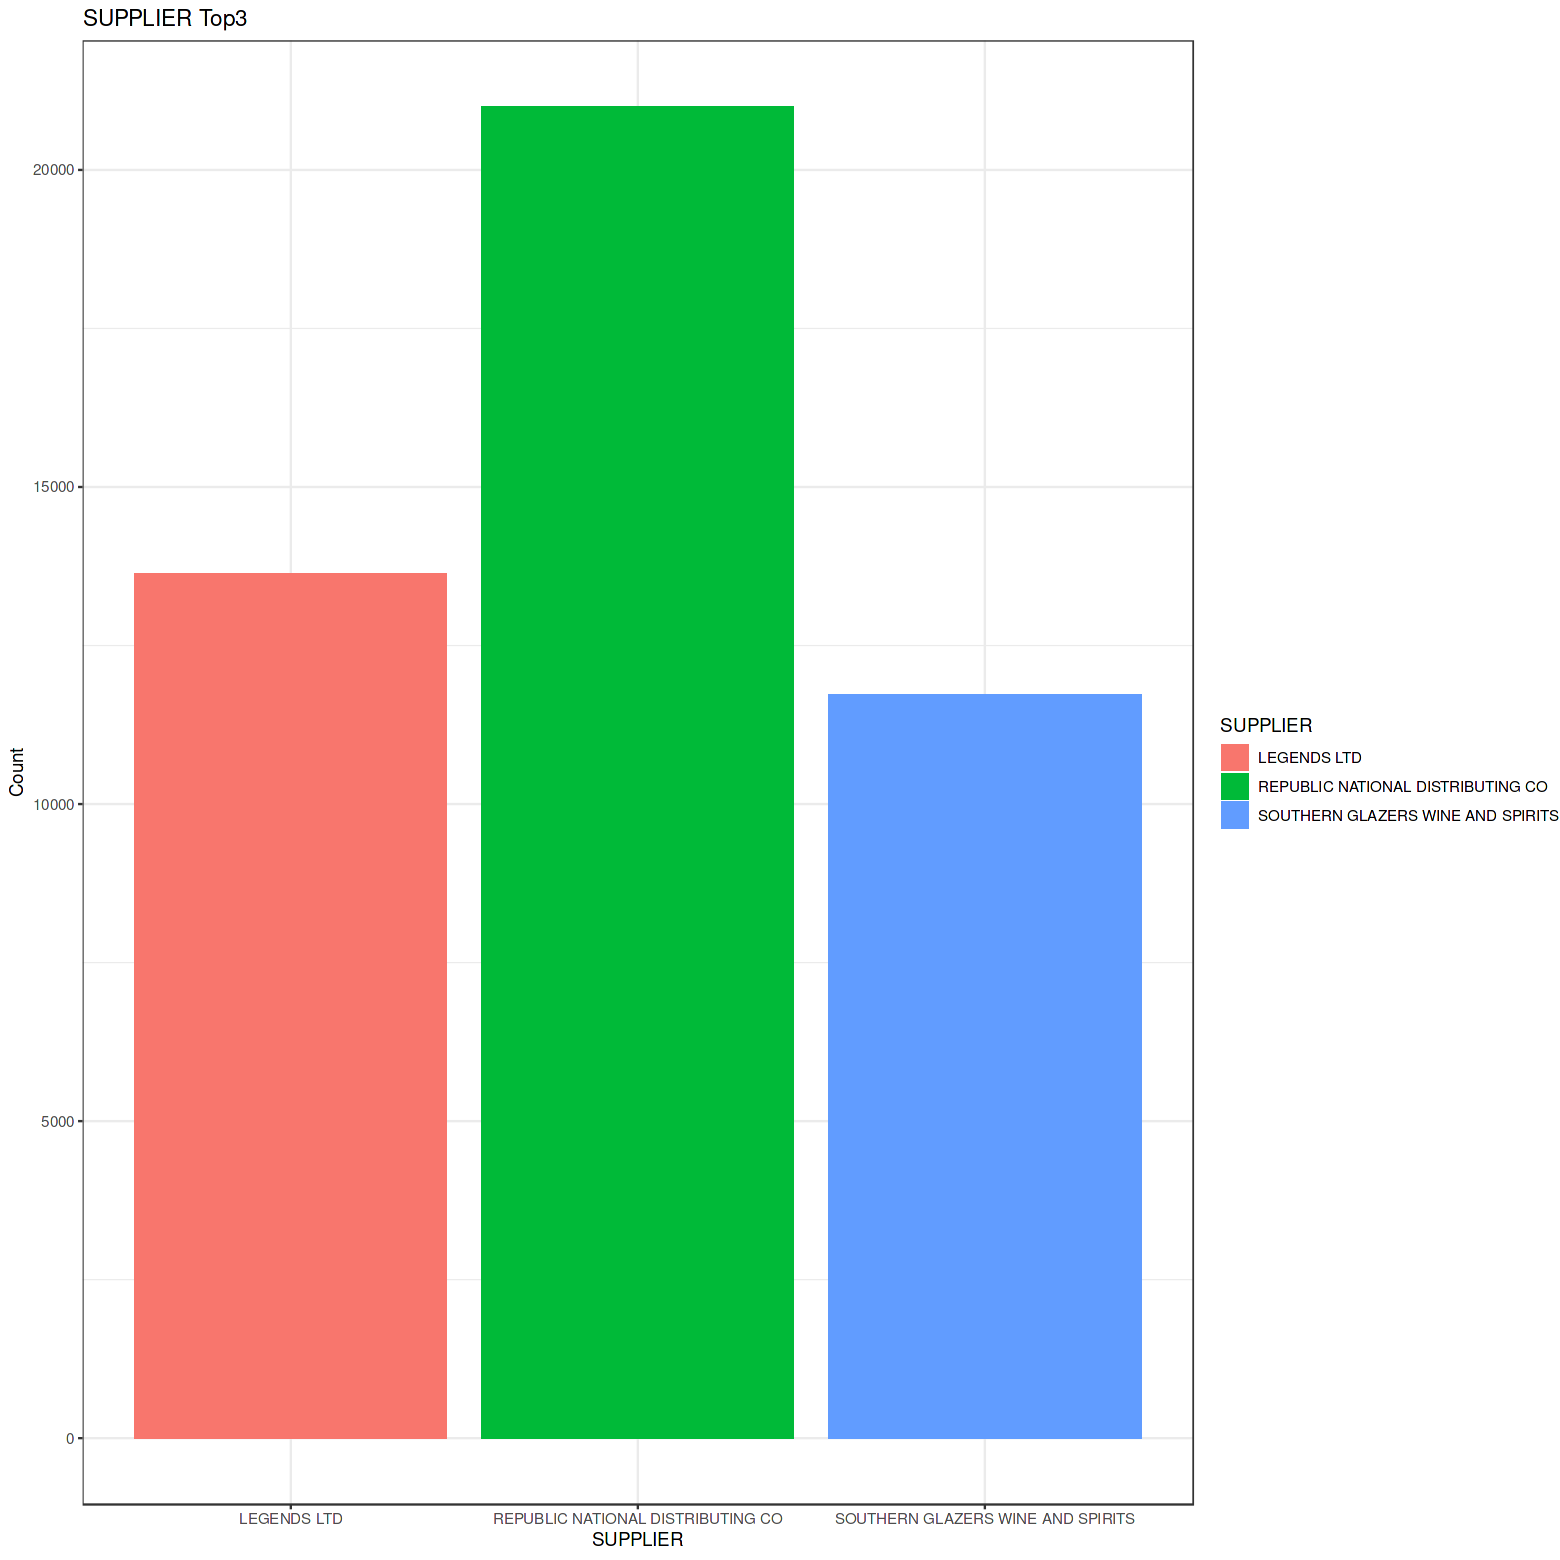

In [64]:
ggplot(SUPPLIER_top3) + geom_col(aes(x = SUPPLIER , y= N, fill = SUPPLIER)) +  ylab('Count') + ggtitle('SUPPLIER Top3 ') + theme_bw()

--------

In [81]:
num_cols <- c('RETAIL_SALES','RETAIL_TRANSFERS','WAREHOUSE_SALES')

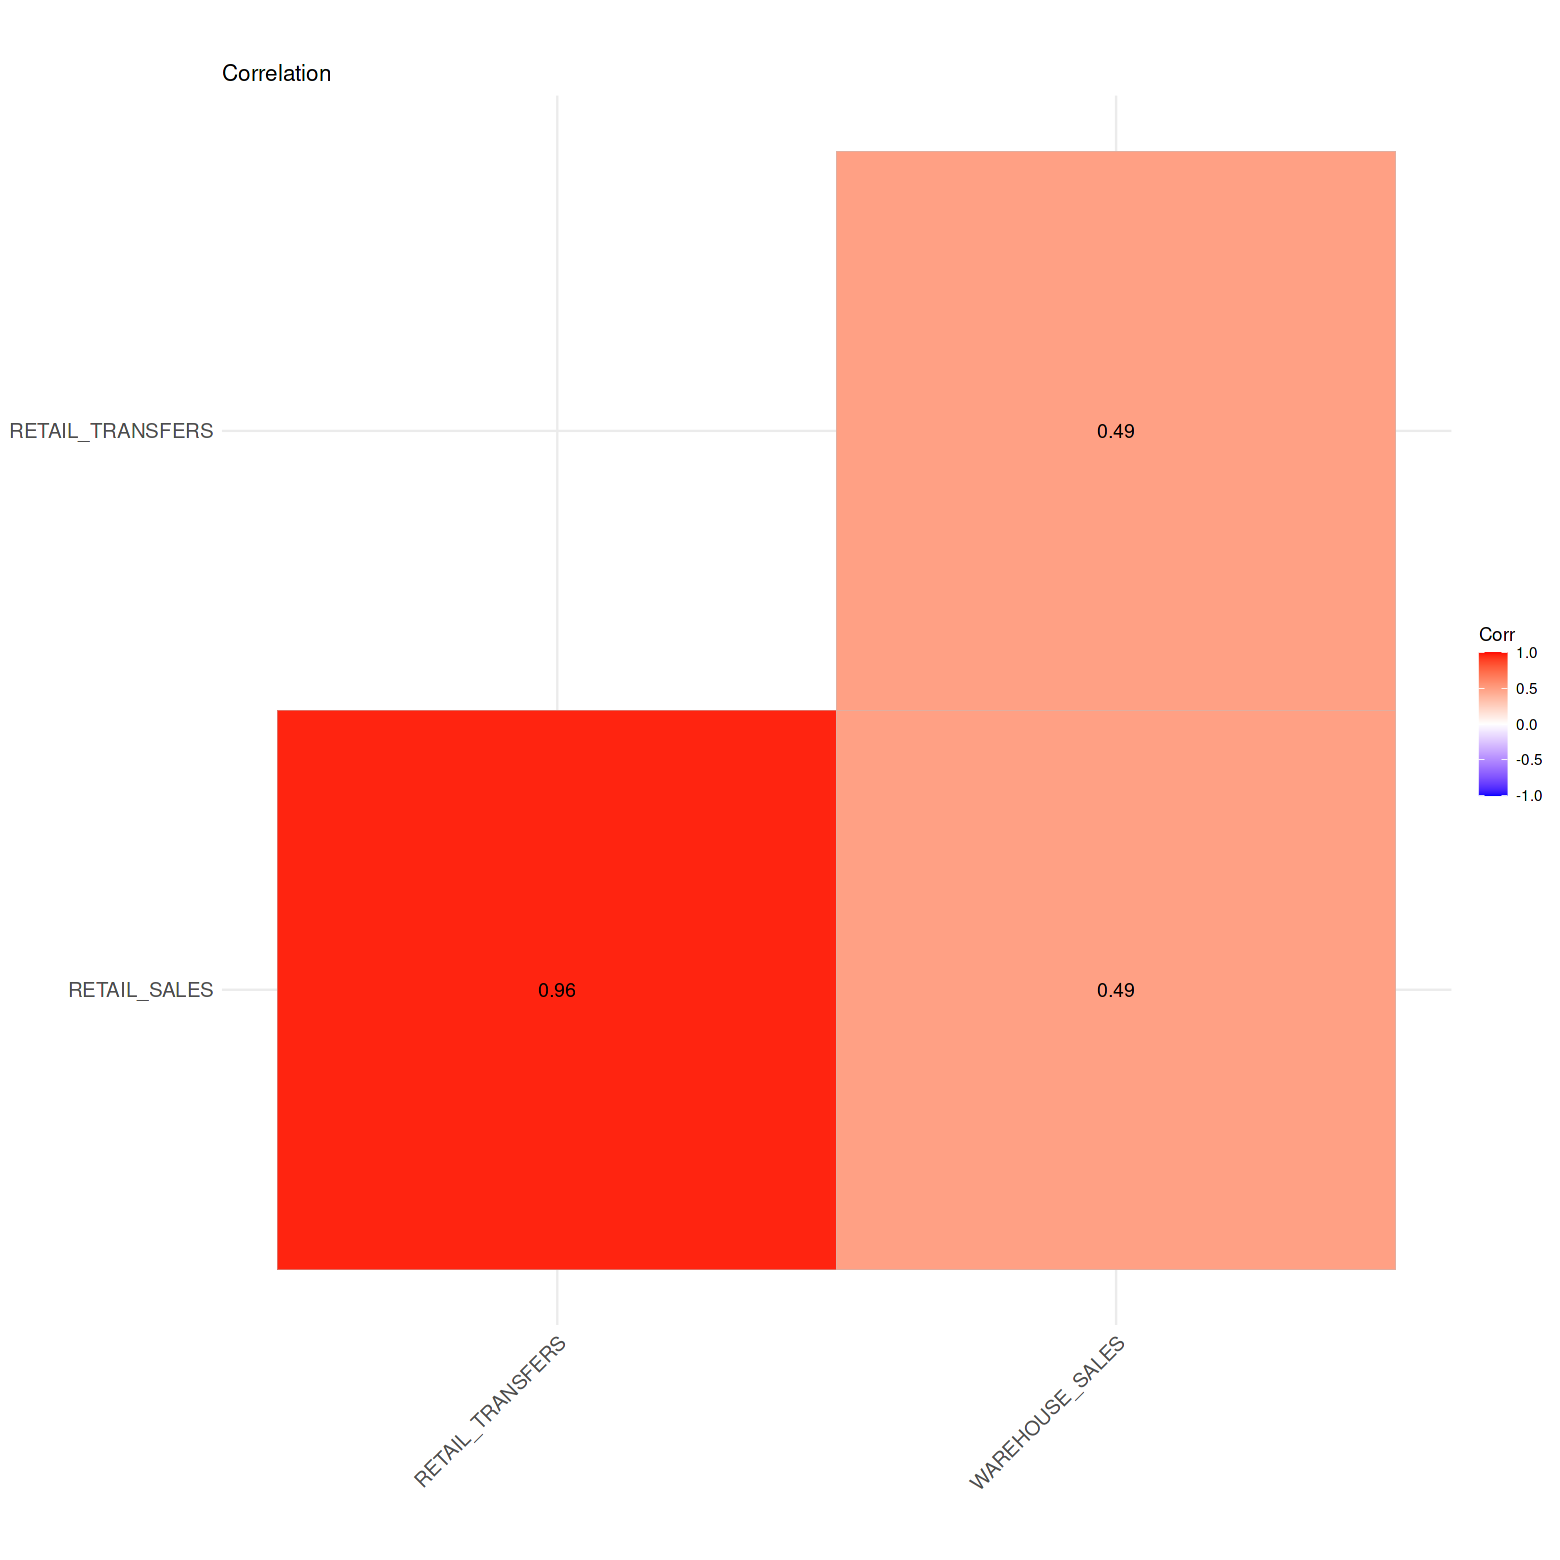

In [82]:
ggcorrplot(cor(data[,num_cols]), type = "lower", lab=T, title = 'Correlation')

--------

**Please leave your advice in the comments. Thank you**